In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lasio
import seaborn as sns

In [3]:
las = lasio.read(r'C:\Users\RAVI TEJ\Documents\well log projects\Gorgonichthys_1_suite3_supercombo_log.las')
df = las.df()
df.head()

,AT10,AT20,AT30,AT60,AT90,CALI,DRHO,DT2,DTCO,DTSM,GR,PEF,PR,RHOB,RT,SPHI,TNPH,VPVS
DEPTH,,,,,,,,,,,,,,,,,,
4775.7588,4.675,4.591,4.656,4.755,4.827,8.041,0.154,167.465,79.789,167.465,195.824,6.827,0.353,2.749,210.536,0.186,0.434,2.099
4775.6064,4.675,4.591,4.655,4.755,4.827,8.041,0.154,167.465,79.789,167.465,195.824,6.827,0.353,2.749,4.801,0.186,0.434,2.099
4775.4540,4.675,4.591,4.655,4.756,4.827,8.041,0.154,167.465,79.789,167.465,195.824,6.827,0.353,2.749,4.801,0.186,0.434,2.099
4775.3016,4.675,4.591,4.655,4.756,4.827,8.041,0.154,167.465,79.789,167.465,195.824,6.827,0.353,2.749,4.801,0.186,0.434,2.099
4775.1492,4.675,4.591,4.655,4.756,4.827,8.041,0.154,167.465,79.789,167.465,195.824,6.827,0.353,2.749,4.801,0.186,0.434,2.099


In [4]:
print(las.curves)

Mnemonic  Unit  Value  Description                               
--------  ----  -----  -----------                               
DEPTH     M            DEPTH (BOREHOLE)                          
AT10      OHMM         Array Induction Two Foot Resistivity A10  
AT20      OHMM         Array Induction Two Foot Resistivity A20  
AT30      OHMM         Array Induction Two Foot Resistivity A30  
AT60      OHMM         Array Induction Two Foot Resistivity A60  
AT90      OHMM         Array Induction Two Foot Resistivity A90  
CALI      IN           Caliper                                   
DRHO      G/C3         Bulk Density Correction                   
DT2       US/F         Delta-T Shear - Upper Dipole              
DTCO      US/F         Delta-T Compressional                     
DTSM      US/F         Delta-T Shear                             
GR        GAPI         Gamma Ray                                 
PEF                    Photoelectric Factor                      
PR        

In [5]:
df.reset_index(inplace=True)
df.head()

,DEPTH,AT10,AT20,AT30,AT60,AT90,CALI,DRHO,DT2,DTCO,DTSM,GR,PEF,PR,RHOB,RT,SPHI,TNPH,VPVS
0,4775.7588,4.675,4.591,4.656,4.755,4.827,8.041,0.154,167.465,79.789,167.465,195.824,6.827,0.353,2.749,210.536,0.186,0.434,2.099
1,4775.6064,4.675,4.591,4.655,4.755,4.827,8.041,0.154,167.465,79.789,167.465,195.824,6.827,0.353,2.749,4.801,0.186,0.434,2.099
2,4775.4540,4.675,4.591,4.655,4.756,4.827,8.041,0.154,167.465,79.789,167.465,195.824,6.827,0.353,2.749,4.801,0.186,0.434,2.099
3,4775.3016,4.675,4.591,4.655,4.756,4.827,8.041,0.154,167.465,79.789,167.465,195.824,6.827,0.353,2.749,4.801,0.186,0.434,2.099
4,4775.1492,4.675,4.591,4.655,4.756,4.827,8.041,0.154,167.465,79.789,167.465,195.824,6.827,0.353,2.749,4.801,0.186,0.434,2.099


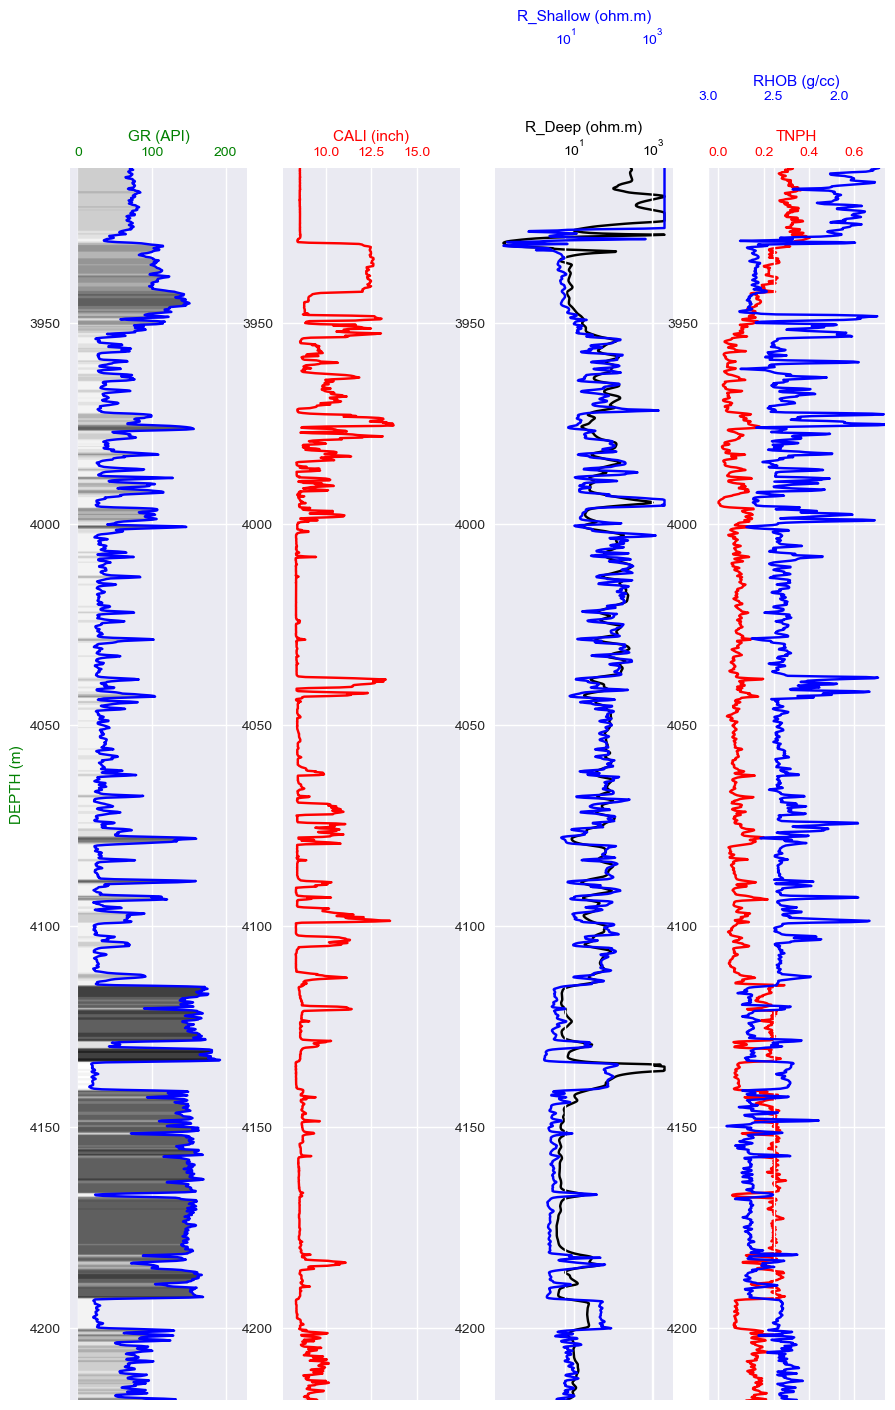

In [6]:
fig, axes = plt.subplots(figsize=(16,16))
plt.style.use('seaborn')

ax1 = plt.subplot2grid((1,6),(0,0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((1,6),(0,1), rowspan=1, colspan=1)
ax3 = plt.subplot2grid((1,6),(0,2), rowspan=1, colspan=1)
ax4 = plt.subplot2grid((1,6),(0,3), rowspan=1, colspan=1)
# ax5 = plt.subplot2grid((1,6),(0,4), rowspan=1, colspan=1)

ax1.plot(df['GR'], df['DEPTH'], c='b')
ax1.set_ylim(4218,3911.5)

left_value = 0
right_value = 200
span = abs(left_value-right_value)
cmap = plt.get_cmap()
color_index = np.arange(left_value, right_value, span/10)

for index in sorted(color_index):
    index_value = (index - left_value)/span
    color = cmap(index_value)
    
    ax1.fill_betweenx(df['DEPTH'], left_value, df['GR'], where=df['GR']>=index, color=color)
    
ax1.spines['top'].set_position(('outward', 0))
ax1.tick_params(axis='x', colors='g')
ax1.set_xlabel("GR (API)", color='g')
ax1.set_ylabel("DEPTH (m)", color='g')
ax1.xaxis.tick_top()
# ax1.axhline(y=4002,color='red')
# ax1.axhline(y=4077,color='red')
# ax1.axhline(y=4079,color='red')
# ax1.axhline(y=4115,color='red')
# ax1.axhline(y=4133.8,color='red')
# ax1.axhline(y=4140.8,color='red')
# ax1.axhline(y=4193.1,color='red')
# ax1.axhline(y=4200.5,color='red')
# ax1.axhline(y=4134,color='red')
# ax1.axhline(y=4141,color='red')
ax1.xaxis.set_label_position('top')
ax1.grid(True)


ax2.plot(df['CALI'], df['DEPTH'], c='r')
ax2.set_ylim(4218,3911.5)
ax2.spines['top'].set_position(('outward', 0))
ax2.tick_params(axis='x', colors='r')
ax2.set_xlabel("CALI (inch)", color='r')
#ax2.set_ylabel("DEPTH (m)", color='r')
ax2.xaxis.tick_top()
# ax2.axhline(y=4002,color='red')
# ax2.axhline(y=4077,color='red')
# ax2.axhline(y=4079,color='red')
# ax2.axhline(y=4115,color='red')
# ax2.axhline(y=4133.8,color='red')
# ax2.axhline(y=4140.8,color='red')
# ax2.axhline(y=4193.1,color='red')
# ax1.axhline(y=4200.5,color='red')
ax2.xaxis.set_label_position('top')
ax2.grid(True)


# ax3_2 = ax3.twiny()
ax3_3 = ax3.twiny()

ax3.plot(df['RT'], df['DEPTH'], c='black')
ax3.spines['top'].set_position(('outward',0))
ax3.tick_params(axis='x', colors='black')
ax3.set_xlabel("R_Deep (ohm.m)", color='black')
ax3.xaxis.tick_top()
ax3.semilogx()
ax3.xaxis.set_label_position('top')
# ax3.axhline(y=4002,color='red')
# ax3.axhline(y=4077,color='red')
# ax3.axhline(y=4079,color='red')
# ax3.axhline(y=4115,color='red')
# ax3.axhline(y=4133.8,color='red')
# ax3.axhline(y=4140.8,color='red')
# ax3.axhline(y=4193.1,color='red')
# ax3.axhline(y=4200.5,color='red')
ax3.grid(True)
ax3.set_ylim(4218,3911.5)

# ax3_2.plot(df['AT30'], df['DEPTH'], c='red')
# ax3_2.spines['top'].set_position(('outward',40))
# ax3_2.tick_params(axis='x', colors='red')
# ax3_2.set_xlabel("R_Mid (ohm.m)", color='red')
# ax3_2.xaxis.tick_top()
# ax3_2.semilogx()
# ax3_2.xaxis.set_label_position('top')
# ax3_2.grid()
# ax3_2.set_ylim(4467,3911.5)

ax3_3.plot(df['AT10'], df['DEPTH'], c='blue')
ax3_3.spines['top'].set_position(('outward',80))
ax3_3.tick_params(axis='x', colors='blue')
ax3_3.set_xlabel("R_Shallow (ohm.m)", color='blue')
ax3_3.xaxis.tick_top()
ax3_3.semilogx()
ax3_3.xaxis.set_label_position('top')
# ax3_3.axhline(y=4002,color='red')
# ax3_3.axhline(y=4077,color='red')
# ax3_3.axhline(y=4079,color='red')
# ax3_3.axhline(y=4115,color='red')
# ax3_3.axhline(y=4133.8,color='red')
# ax3_3.axhline(y=4140.8,color='red')
# ax3_3.axhline(y=4193.1,color='red')
# ax3_3.axhline(y=4200.5,color='red')
ax3_3.grid(True)
ax3_3.set_ylim(4218,3911.5)


ax4_2 = ax4.twiny()


ax4.plot(df['TNPH'], df['DEPTH'], c='r')
ax4.set_ylim(4218,3911.5)
ax4.spines['top'].set_position(('outward', 0))
ax4.tick_params(axis='x', colors='r')
ax4.set_xlabel("TNPH", color='r')
#ax4.set_ylabel("DEPTH (m)", color='r')
ax4.xaxis.tick_top()
ax4.xaxis.set_label_position('top')
# ax4.axhline(y=4002,color='red')
# ax4.axhline(y=4077,color='red')
# ax4.axhline(y=4079,color='red')
# ax4.axhline(y=4115,color='red')
# ax4.axhline(y=4133.8,color='red')
# ax4.axhline(y=4140.8,color='red')
# ax4.axhline(y=4193.1,color='red')
# ax4.axhline(y=4200.5,color='red')
ax4.grid(True)

ax4_2.plot(df['RHOB'], df['DEPTH'], c='blue')
ax4_2.set_ylim(4218,3911.5)
ax4_2.spines['top'].set_position(('outward', 40))
ax4_2.tick_params(axis='x', colors='blue')
ax4_2.set_xlabel("RHOB (g/cc)", color='blue')
#ax4_2.set_ylabel("DEPTH (m)", color='blue')
ax4_2.xaxis.tick_top()
# ax4_2.xaxis.set_label_position('top')
# ax4_2.axhline(y=4002,color='red')
# ax4_2.axhline(y=4077,color='red')
# ax4_2.axhline(y=4079,color='red')
# ax4_2.axhline(y=4115,color='red')
# ax4_2.axhline(y=4133.8,color='red')
# ax4_2.axhline(y=4140.8,color='red')
# ax4_2.axhline(y=4193.1,color='red')
# ax4_2.axhline(y=4200.5,color='red')
ax4_2.set_xlim(3,1.65)
ax4_2.grid(True)


# ax5.plot(df['DTCO'], df['DEPTH'], c='black')
# ax5.set_ylim(4467,3911.5)
# ax5.spines['top'].set_position(('outward', 0))
# ax5.tick_params(axis='x', colors='black')
# ax5.set_xlabel("DTC(microfeet/s)", color='black')
# #ax5.set_ylabel("DEPTH (m)", color='black')
# ax5.xaxis.tick_top()
# ax5.xaxis.set_label_position('top')
# ax5.grid()


# for ax in [ax2, ax3, ax4]:
#     plt.setp(ax.get_yticklabels(), visible=False)

# fig.suptitle("Well - GORGONICHTHYS-1 ", fontsize=25)


plt.show()

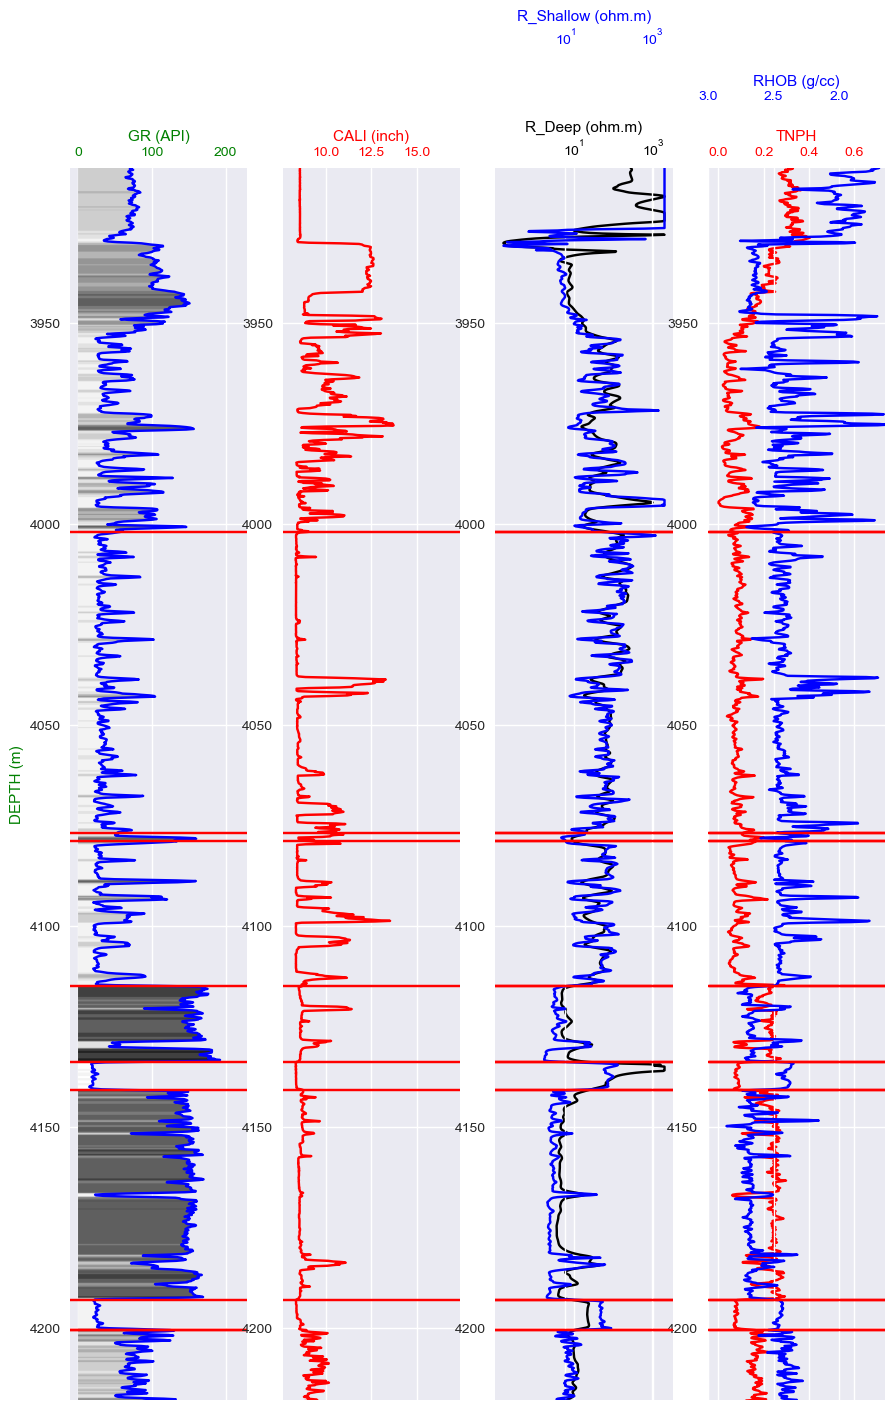

In [7]:
fig, axes = plt.subplots(figsize=(16,16))
plt.style.use('seaborn')

ax1 = plt.subplot2grid((1,6),(0,0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((1,6),(0,1), rowspan=1, colspan=1)
ax3 = plt.subplot2grid((1,6),(0,2), rowspan=1, colspan=1)
ax4 = plt.subplot2grid((1,6),(0,3), rowspan=1, colspan=1)
# ax5 = plt.subplot2grid((1,6),(0,4), rowspan=1, colspan=1)

ax1.plot(df['GR'], df['DEPTH'], c='b')
ax1.set_ylim(4218,3911.5)

left_value = 0
right_value = 200
span = abs(left_value-right_value)
cmap = plt.get_cmap()
color_index = np.arange(left_value, right_value, span/10)

for index in sorted(color_index):
    index_value = (index - left_value)/span
    color = cmap(index_value)
    
    ax1.fill_betweenx(df['DEPTH'], left_value, df['GR'], where=df['GR']>=index, color=color)
    
ax1.spines['top'].set_position(('outward', 0))
ax1.tick_params(axis='x', colors='g')
ax1.set_xlabel("GR (API)", color='g')
ax1.set_ylabel("DEPTH (m)", color='g')
ax1.xaxis.tick_top()
ax1.axhline(y=4002,color='red')
ax1.axhline(y=4077,color='red')
ax1.axhline(y=4079,color='red')
ax1.axhline(y=4115,color='red')
ax1.axhline(y=4133.8,color='red')
ax1.axhline(y=4140.8,color='red')
ax1.axhline(y=4193.1,color='red')
ax1.axhline(y=4200.5,color='red')
# ax1.axhline(y=4134,color='red')
# ax1.axhline(y=4141,color='red')
ax1.xaxis.set_label_position('top')
ax1.grid(True)


ax2.plot(df['CALI'], df['DEPTH'], c='r')
ax2.set_ylim(4218,3911.5)
ax2.spines['top'].set_position(('outward', 0))
ax2.tick_params(axis='x', colors='r')
ax2.set_xlabel("CALI (inch)", color='r')
#ax2.set_ylabel("DEPTH (m)", color='r')
ax2.xaxis.tick_top()
ax2.axhline(y=4002,color='red')
ax2.axhline(y=4077,color='red')
ax2.axhline(y=4079,color='red')
ax2.axhline(y=4115,color='red')
ax2.axhline(y=4133.8,color='red')
ax2.axhline(y=4140.8,color='red')
ax2.axhline(y=4193.1,color='red')
ax1.axhline(y=4200.5,color='red')
ax2.xaxis.set_label_position('top')
ax2.grid(True)


# ax3_2 = ax3.twiny()
ax3_3 = ax3.twiny()

ax3.plot(df['RT'], df['DEPTH'], c='black')
ax3.spines['top'].set_position(('outward',0))
ax3.tick_params(axis='x', colors='black')
ax3.set_xlabel("R_Deep (ohm.m)", color='black')
ax3.xaxis.tick_top()
ax3.semilogx()
ax3.xaxis.set_label_position('top')
ax3.axhline(y=4002,color='red')
ax3.axhline(y=4077,color='red')
ax3.axhline(y=4079,color='red')
ax3.axhline(y=4115,color='red')
ax3.axhline(y=4133.8,color='red')
ax3.axhline(y=4140.8,color='red')
ax3.axhline(y=4193.1,color='red')
ax3.axhline(y=4200.5,color='red')
ax3.grid(True)
ax3.set_ylim(4218,3911.5)

# ax3_2.plot(df['AT30'], df['DEPTH'], c='red')
# ax3_2.spines['top'].set_position(('outward',40))
# ax3_2.tick_params(axis='x', colors='red')
# ax3_2.set_xlabel("R_Mid (ohm.m)", color='red')
# ax3_2.xaxis.tick_top()
# ax3_2.semilogx()
# ax3_2.xaxis.set_label_position('top')
# ax3_2.grid()
# ax3_2.set_ylim(4467,3911.5)

ax3_3.plot(df['AT10'], df['DEPTH'], c='blue')
ax3_3.spines['top'].set_position(('outward',80))
ax3_3.tick_params(axis='x', colors='blue')
ax3_3.set_xlabel("R_Shallow (ohm.m)", color='blue')
ax3_3.xaxis.tick_top()
ax3_3.semilogx()
ax3_3.xaxis.set_label_position('top')
ax3_3.axhline(y=4002,color='red')
ax3_3.axhline(y=4077,color='red')
ax3_3.axhline(y=4079,color='red')
ax3_3.axhline(y=4115,color='red')
ax3_3.axhline(y=4133.8,color='red')
ax3_3.axhline(y=4140.8,color='red')
ax3_3.axhline(y=4193.1,color='red')
ax3_3.axhline(y=4200.5,color='red')
ax3_3.grid(True)
ax3_3.set_ylim(4218,3911.5)


ax4_2 = ax4.twiny()


ax4.plot(df['TNPH'], df['DEPTH'], c='r')
ax4.set_ylim(4218,3911.5)
ax4.spines['top'].set_position(('outward', 0))
ax4.tick_params(axis='x', colors='r')
ax4.set_xlabel("TNPH", color='r')
#ax4.set_ylabel("DEPTH (m)", color='r')
ax4.xaxis.tick_top()
ax4.xaxis.set_label_position('top')
ax4.axhline(y=4002,color='red')
ax4.axhline(y=4077,color='red')
ax4.axhline(y=4079,color='red')
ax4.axhline(y=4115,color='red')
ax4.axhline(y=4133.8,color='red')
ax4.axhline(y=4140.8,color='red')
ax4.axhline(y=4193.1,color='red')
ax4.axhline(y=4200.5,color='red')
ax4.grid(True)

ax4_2.plot(df['RHOB'], df['DEPTH'], c='blue')
ax4_2.set_ylim(4218,3911.5)
ax4_2.spines['top'].set_position(('outward', 40))
ax4_2.tick_params(axis='x', colors='blue')
ax4_2.set_xlabel("RHOB (g/cc)", color='blue')
#ax4_2.set_ylabel("DEPTH (m)", color='blue')
ax4_2.xaxis.tick_top()
ax4_2.xaxis.set_label_position('top')
ax4_2.axhline(y=4002,color='red')
ax4_2.axhline(y=4077,color='red')
ax4_2.axhline(y=4079,color='red')
ax4_2.axhline(y=4115,color='red')
ax4_2.axhline(y=4133.8,color='red')
ax4_2.axhline(y=4140.8,color='red')
ax4_2.axhline(y=4193.1,color='red')
ax4_2.axhline(y=4200.5,color='red')
ax4_2.set_xlim(3,1.65)
ax4_2.grid(True)


# ax5.plot(df['DTCO'], df['DEPTH'], c='black')
# ax5.set_ylim(4467,3911.5)
# ax5.spines['top'].set_position(('outward', 0))
# ax5.tick_params(axis='x', colors='black')
# ax5.set_xlabel("DTC(microfeet/s)", color='black')
# #ax5.set_ylabel("DEPTH (m)", color='black')
# ax5.xaxis.tick_top()
# ax5.xaxis.set_label_position('top')
# ax5.grid()


# for ax in [ax2, ax3, ax4]:
#     plt.setp(ax.get_yticklabels(), visible=False)

# fig.suptitle("Well - GORGONICHTHYS-1 ", fontsize=25)


plt.show()

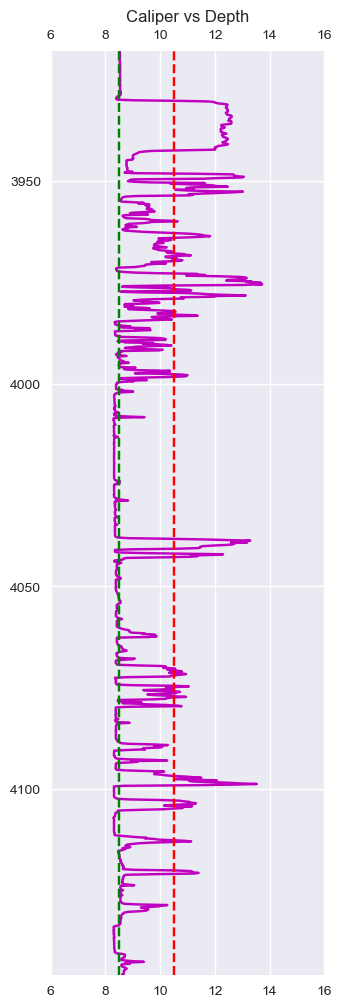

In [8]:
fig = plt.figure(figsize=(12,12))
plt.style.use('seaborn')
ax1=fig.add_subplot(131)
ax1.title.set_text('Caliper vs Depth')
# plt.plot(df2.BS,df2.DEPTH)
plt.plot(df.CALI,df.DEPTH,color='m')
plt.axvline(x=8.5,color='green',linestyle='--')
plt.axvline(x=10.5,color='red',linestyle='--')
plt.ylim(4146,3918)
plt.xlim(6,16)
plt.tick_params(labeltop=True,labelleft=True,labelbottom=True,labelright=False)
plt.show()

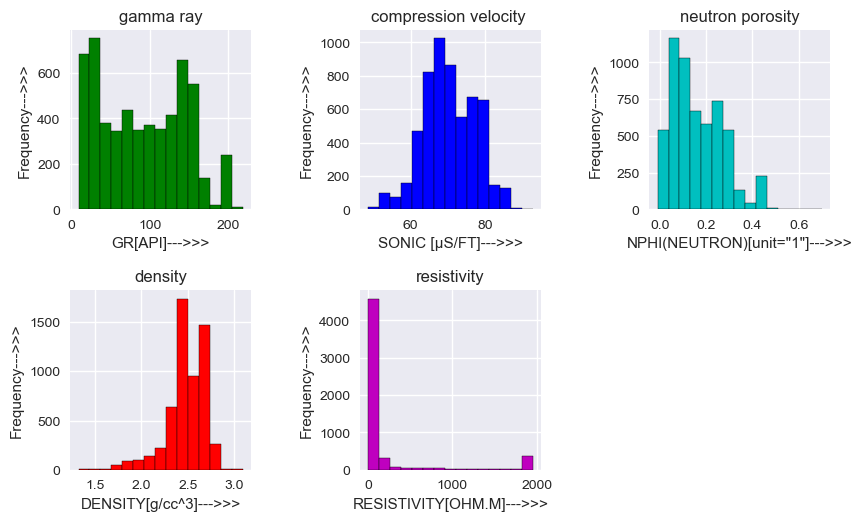

In [9]:
# Histogram plot of GR, SP, NPHI, RHOB
plt.figure(1, figsize=(8,4))
plt.style.use('seaborn')
plt.subplot(231)
plt.hist(df['GR'], bins=15, color='g', edgecolor='k')
plt.xlabel('GR[API]--->>>')
plt.ylabel('Frequency--->>>')
plt.title('gamma ray')
# plt.grid()

plt.subplot(232)
plt.hist(df['DTCO'], bins=15, color='b', edgecolor='k')
plt.xlabel('SONIC [µS/FT]--->>>')
plt.ylabel('Frequency--->>>')
plt.title('compression velocity ')

# plt.grid()

plt.subplot(233)
plt.hist(df['TNPH'], bins=15, color='c', edgecolor='k')
plt.xlabel('NPHI(NEUTRON)[unit="1"]--->>>')
plt.ylabel('Frequency--->>>')
plt.title('neutron porosity')
# plt.grid()

plt.subplot(234)
plt.hist(df['RHOB'], bins=15, color='r', edgecolor='k')
plt.xlabel('DENSITY[g/cc^3]--->>>')
plt.ylabel('Frequency--->>>')
plt.title('density')
# plt.grid()

plt.subplot(235)
plt.hist(df['AT10'], bins=15, color='m', edgecolor='k')
plt.xlabel('RESISTIVITY[OHM.M]--->>>')
plt.ylabel('Frequency--->>>')
plt.title('resistivity')
# plt.grid()

plt.subplots_adjust(top=1.2, bottom=.1, left=0.05, right=1, hspace=0.45, wspace=0.60)
# plt.title('(GR, neutron, Sonic, density, resistivity)')



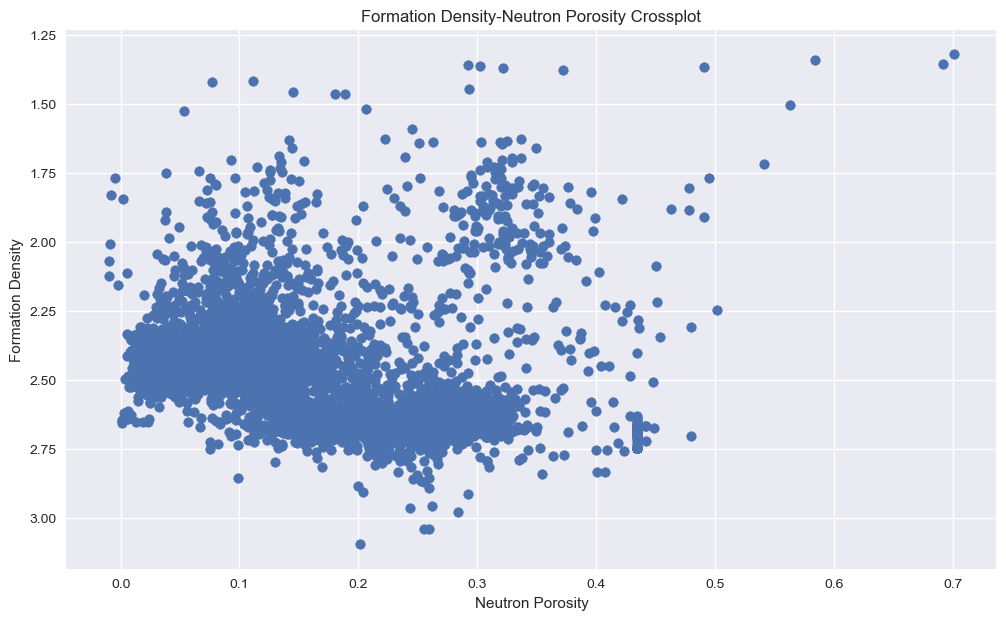

In [10]:
fig,ax=plt.subplots(figsize=(12,7))
plot=ax.scatter(x=df['TNPH'],y=df['RHOB'],cmap='plasma')
# ax.text(0.06,1.8,'Gas Correction',
#             bbox=dict(boxstyle='circle,pad=0.3',alpha=0.3,facecolor='green'))
ax.set_xlabel('Neutron Porosity')
ax.set_ylabel('Formation Density')
ax.set_title('Formation Density-Neutron Porosity Crossplot')
ax.invert_yaxis()
ax.grid(True)
# plt.colorbar(plot,label='Volume of Shale (cc)')
plt.show()

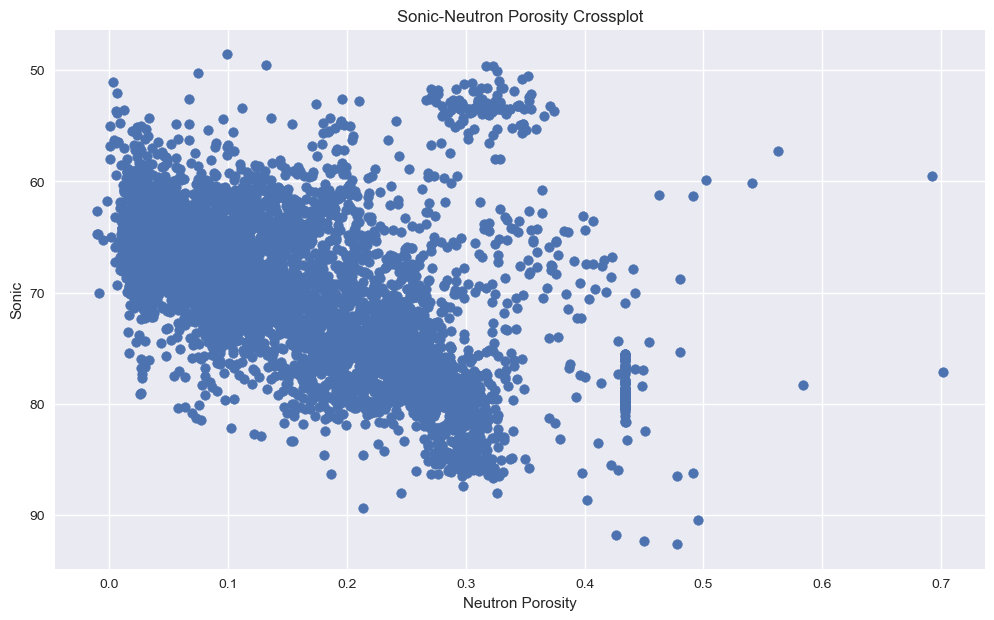

In [11]:
fig,ax=plt.subplots(figsize=(12,7))
plot=ax.scatter(x=df['TNPH'],y=df['DTCO'],cmap='plasma')
# ax.text(0.06,1.8,'Gas Correction',
#             bbox=dict(boxstyle='circle,pad=0.3',alpha=0.3,facecolor='green'))
ax.set_xlabel('Neutron Porosity')
ax.set_ylabel('Sonic')
ax.set_title('Sonic-Neutron Porosity Crossplot')
ax.invert_yaxis()
ax.grid(True)
# plt.colorbar(plot,label='Volume of Shale (cc)')
plt.show()

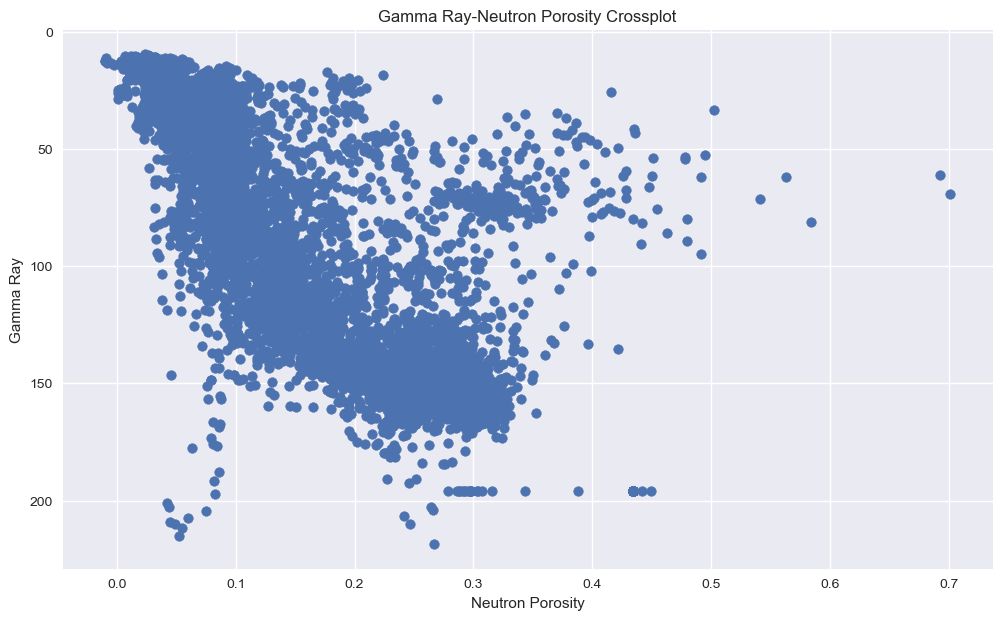

In [12]:
fig,ax=plt.subplots(figsize=(12,7))
plot=ax.scatter(x=df['TNPH'],y=df['GR'],cmap='plasma')
# ax.text(0.06,1.8,'Gas Correction',
#             bbox=dict(boxstyle='circle,pad=0.3',alpha=0.3,facecolor='green'))
ax.set_xlabel('Neutron Porosity')
ax.set_ylabel('Gamma Ray')
ax.set_title('Gamma Ray-Neutron Porosity Crossplot')
ax.invert_yaxis()
ax.grid(True)
# plt.colorbar(plot,label='Volume of Shale (cc)')
plt.show()

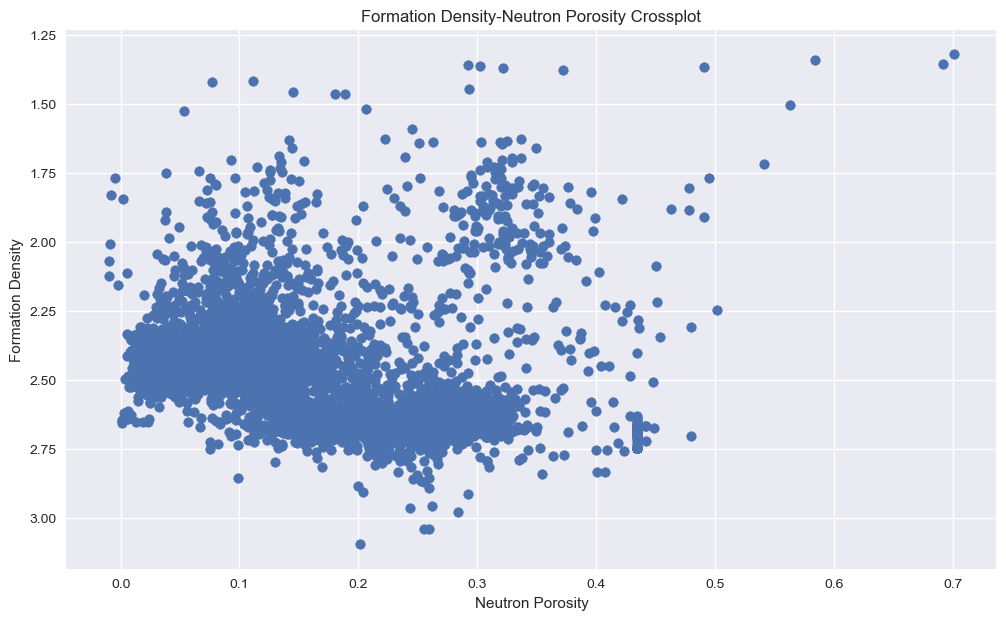

In [13]:
fig,ax=plt.subplots(figsize=(12,7))
plot=ax.scatter(x=df['TNPH'],y=df['RHOB'],cmap='plasma')
# ax.text(0.06,1.8,'Gas Correction',
#             bbox=dict(boxstyle='circle,pad=0.3',alpha=0.3,facecolor='green'))
ax.set_xlabel('Neutron Porosity')
ax.set_ylabel('Formation Density')
ax.set_title('Formation Density-Neutron Porosity Crossplot')
ax.invert_yaxis()
ax.grid(True)
# plt.colorbar(plot,label='Volume of Shale (cc)')
plt.show()

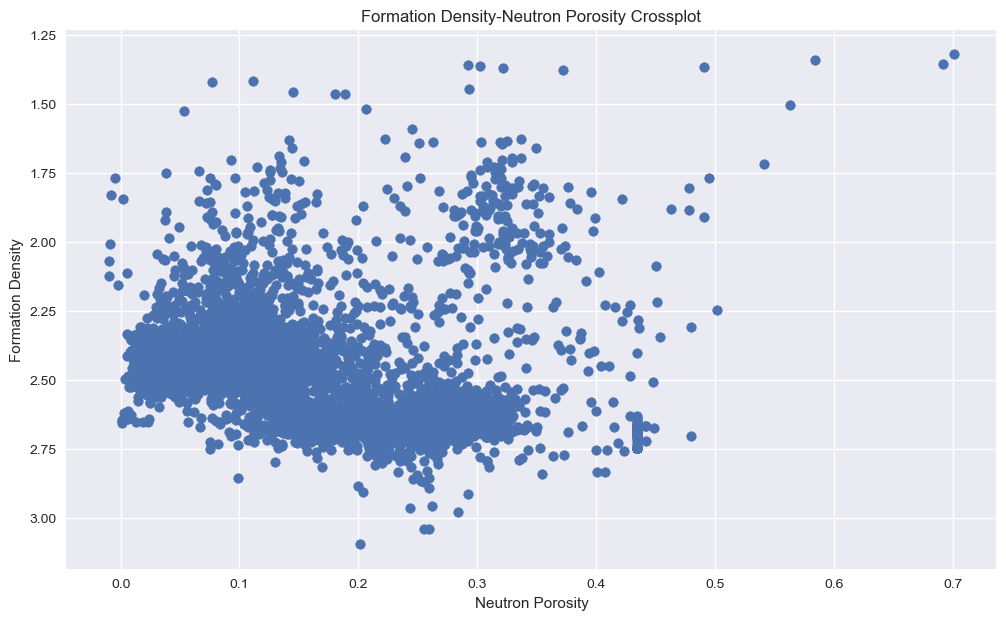

In [14]:
fig,ax=plt.subplots(figsize=(12,7))
plot=ax.scatter(x=df['TNPH'],y=df['RHOB'],cmap='plasma')
# ax.text(0.06,1.8,'Gas Correction',
#             bbox=dict(boxstyle='circle,pad=0.3',alpha=0.3,facecolor='green'))
ax.set_xlabel('Neutron Porosity')
ax.set_ylabel('Formation Density')
ax.set_title('Formation Density-Neutron Porosity Crossplot')
ax.invert_yaxis()
ax.grid(True)
# plt.colorbar(plot,label='Volume of Shale (cc)')
plt.show()

p05 : 15.3999
p95:  170.7985


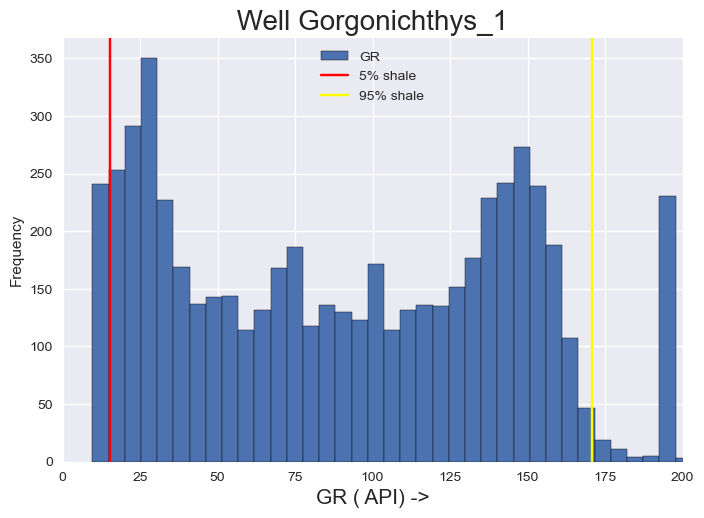

In [16]:
plt.style.use('seaborn')
df['GR'].plot(kind = 'hist',bins = 40, density = False, edgecolor = 'black')
#df['GR'].plot(kind='kde', color = 'black')
plt.xlabel("GR ( API) ->", fontsize=15)
#plt.ylabel("Depth (m) ->", fontsize=15)
plt.xlim(0,200)
plt.title(" Well Gorgonichthys_1 ", size=20)
#mean= df['GR'].mean()
p05 = df['GR'].quantile(0.05)
p95 = df['GR'].quantile(0.95)
#print("Mean :", mean)
print("p05 :", p05)
print("p95: ", p95)
#plt.axvline(mean, color='green', label ='mean')
plt.axvline(p05, color='red', label ='5% shale')
plt.axvline(p95, color='yellow', label ='95% shale')
plt.legend()

In [73]:
GRmin = p05
GRmax = p95
I_GR = (df['GR']- GRmin ) / ( GRmax - GRmin )
Vshale = 0.33*((2**(2*I_GR)) -1)
print(I_GR)
print(max(I_GR),min(I_GR))
print(Vshale)

0       1.161041
1       1.161041
2       1.161041
3       1.161041
4       1.161041
          ...   
5683    0.376310
5684    0.385197
5685    0.366420
5686    0.385326
5687    0.385326
Name: GR, Length: 5688, dtype: float64
1.307927484546193 -0.03711037293772275
0       1.320175
1       1.320175
2       1.320175
3       1.320175
4       1.320175
          ...   
5683    0.226001
5684    0.232893
5685    0.218429
5686    0.232993
5687    0.232993
Name: GR, Length: 5688, dtype: float64


In [74]:
# Evaluting Density porosity

for i in Vshale :
        if i >= 0.4 :
                rho_ma = 2.80            # Condition to calculate rho_ma 
        else :
                rho_ma = 2.65
        

        rho_f = 0.8                          # unit gm/cc
        
        # Now we are trying to calculate the density porosity through the density log :
        
        phi_d = ( rho_ma - df['RHOB'] ) / ( rho_ma - rho_f )
        
print(phi_d)       

0      -0.053514
1      -0.053514
2      -0.053514
3      -0.053514
4      -0.053514
          ...   
5683    0.462703
5684    0.458378
5685    0.457297
5686    0.457297
5687    0.457297
Name: RHOB, Length: 5688, dtype: float64


In [75]:
PHI_T = (0.5*phi_d) + (0.5*df['TNPH'])   # Total porosity
PHI_T
print(max(PHI_T),min(PHI_T))

0.7096891891891892 -0.020040540540540594


In [76]:
S_Wa = (R_w/(((PHI_T)**1.8)*df['RT']))**0.5     # a = 1, m = 1.8, n = 2 
S_Wa
print(max(S_Wa),min(S_Wa))

5.748280475879861 0.01845721206661485


In [77]:
dp=df['DEPTH']
dp1=np.array(dp)
print(dp1)
for i in range(len(dp1)):
    if (dp1[i]>4002) & (dp1[i]<4077):
        phi_dn[i]=phi_d[i]*0.8
    elif (dp1[i]>4079) & (dp1[i]<4115):
        phi_dn[i]=phi_d[i]*0.8
    elif (dp1[i]>4133.8) & (dp1[i]<4140.8):
        phi_dn[i]=phi_d[i]*0.8
    elif (dp1[i]>4193.1) & (dp1[i]<4200.5):
        phi_dn[i]=phi_d[i]*0.8
    else:
        phi_dn[i]=phi_d[i]
print(phi_dn)

[4775.7588 4775.6064 4775.454  ... 3909.3648 3909.2124 3909.06  ]
0      -0.053514
1      -0.053514
2      -0.053514
3      -0.053514
4      -0.053514
          ...   
5683    0.462703
5684    0.458378
5685    0.457297
5686    0.457297
5687    0.457297
Name: RHOB, Length: 5688, dtype: float64


In [96]:
a = 0.5
b = 0.5

PHI_TN = ((a*phi_dn) + (b*df['TNPH']))   # Total porosity
PHI_TN
print(max(PHI_TN),min(PHI_TN))

0.7096891891891892 -0.020040540540540594


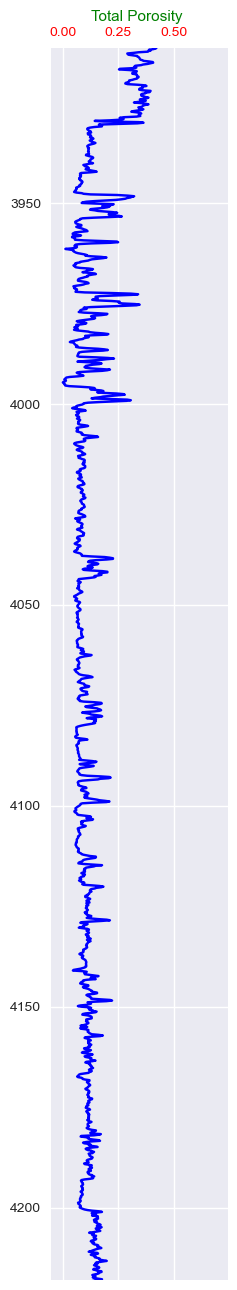

In [69]:
fig, axes = plt.subplots(figsize=(16,16))
plt.style.use('seaborn')

ax2 = plt.subplot2grid((1,6),(0,0), rowspan=1, colspan=1)
ax2.plot(PHI_TN, df['DEPTH'], c='b')
ax2.set_ylim(4218,3911.5)
ax2.spines['top'].set_position(('outward', 0))
ax2.tick_params(axis='x', colors='r')
ax2.set_xlabel("Total Porosity ", color='g')
#ax2.set_ylabel("DEPTH (m)", color='r')
ax2.xaxis.tick_top()
# ax2.axhline(y=4134,color='red')
# ax2.axhline(y=4141,color='red')
ax2.xaxis.set_label_position('top')
ax2.grid(True)
plt.show()

In [39]:

R_w=0.12


In [79]:
S_wa = (R_w/(((PHI_TN)**1.8)*df['RT']))**0.5     # a = 1, m = 1.8, n = 2 
S_wa
print(max(S_wa),min(S_wa))

5.748280475879861 0.01845721206661485


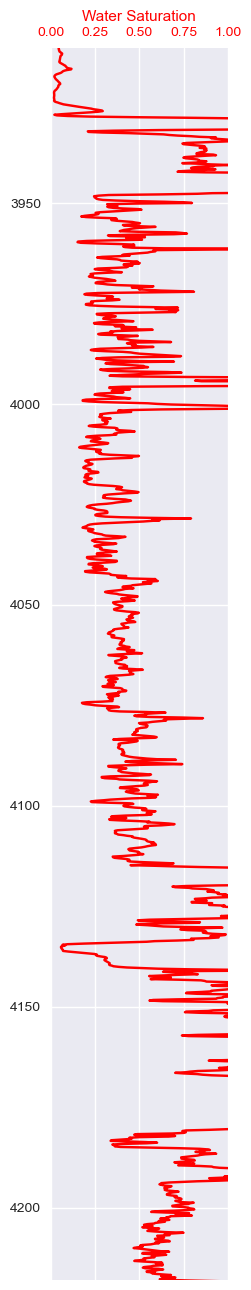

In [88]:
fig, axes = plt.subplots(figsize=(16,16))
plt.style.use('seaborn')

ax1 = plt.subplot2grid((1,6),(0,0), rowspan=1, colspan=1)

ax1.plot(S_wa , df['DEPTH'], c='r')
ax1.set_ylim(4218,3911.5)
ax1.set_xlim(0,1)
ax1.spines['top'].set_position(('outward', 0))
ax1.tick_params(axis='x', colors='r')
ax1.set_xlabel("Water Saturation", color='r')
#ax2.set_ylabel("DEPTH (m)", color='r')
ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top')
# ax1.axhline(y=4002,color='red')
# ax1.axhline(y=4077,color='red')
# ax1.axhline(y=4079,color='red')
# ax1.axhline(y=4115,color='red')
ax1.grid(True)


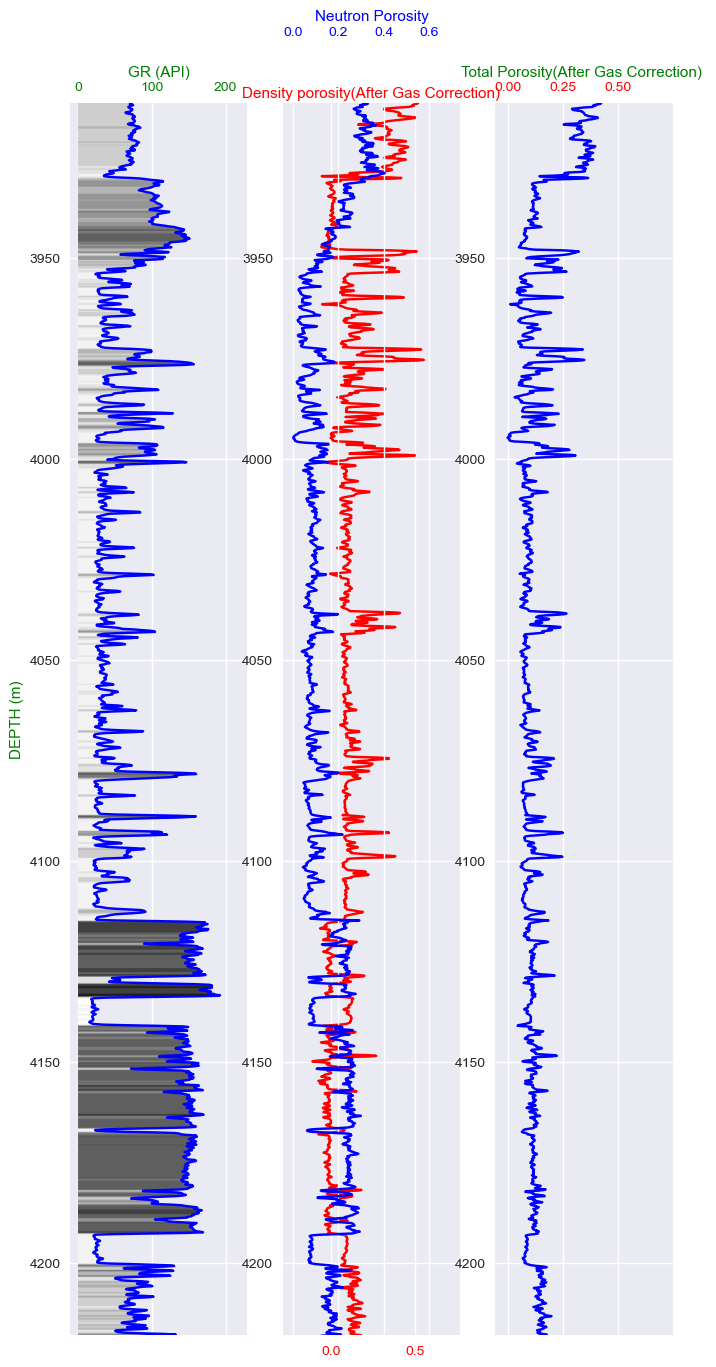

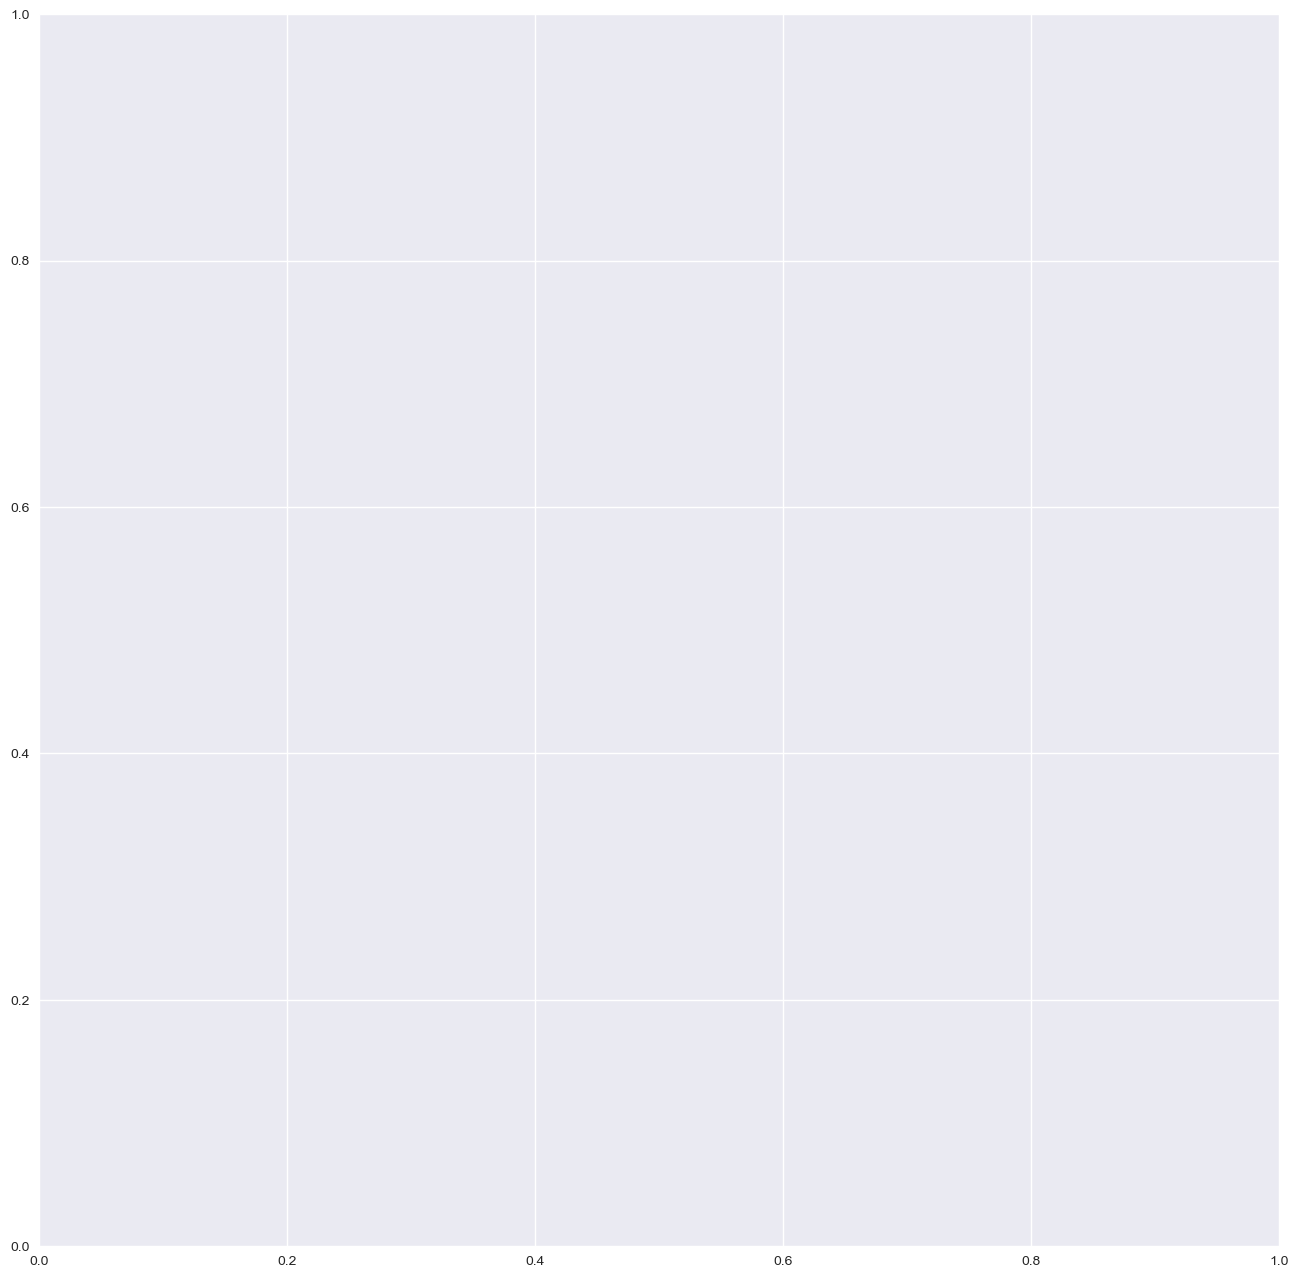

In [89]:
fig, axes = plt.subplots(figsize=(16,16))
plt.style.use('seaborn')

ax1 = plt.subplot2grid((1,6),(0,0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((1,6),(0,1), rowspan=1, colspan=1)
ax3 = plt.subplot2grid((1,6),(0,2), rowspan=1, colspan=1)

ax1.plot(df['GR'], df['DEPTH'], c='b')
ax1.set_ylim(4218,3911.5)

left_value = 0
right_value = 200
span = abs(left_value-right_value)
cmap = plt.get_cmap()
color_index = np.arange(left_value, right_value, span/10)

for index in sorted(color_index):
    index_value = (index - left_value)/span
    color = cmap(index_value)
    
    ax1.fill_betweenx(df['DEPTH'], left_value, df['GR'], where=df['GR']>=index, color=color)
    
ax1.spines['top'].set_position(('outward', 0))
ax1.tick_params(axis='x', colors='g')
ax1.set_xlabel("GR (API)", color='g')
ax1.set_ylabel("DEPTH (m)", color='g')
ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top')
# ax1.axhline(y=4002,color='red')
# ax1.axhline(y=4077,color='red')
# ax1.axhline(y=4079,color='red')
# ax1.axhline(y=4115,color='red')
ax1.grid(True)


ax2.plot(phi_dn , df['DEPTH'], c='r')
ax2.set_ylim(4218,3911.5)
ax2.spines['top'].set_position(('outward', 0))
ax2.tick_params(axis='x', colors='r')
ax2.set_xlabel("Density porosity(After Gas Correction)", color='r')
#ax2.set_ylabel("DEPTH (m)", color='r')
ax2.xaxis.tick_top()
ax2.xaxis.set_label_position('top')
# ax2.axhline(y=4002,color='red')
# ax2.axhline(y=4077,color='red')
# ax2.axhline(y=4079,color='red')
# ax2.axhline(y=4115,color='red')
ax2.grid(True)

ax2_2 = ax2.twiny()

ax2_2.plot(df['TNPH'], df['DEPTH'], c='blue')
ax2_2.set_ylim(4218,3911.5)
ax2_2.spines['top'].set_position(('outward', 40))
ax2_2.tick_params(axis='x', colors='blue')
ax2_2.set_xlabel("Neutron Porosity", color='blue')
#ax4_2.set_ylabel("DEPTH (m)", color='blue')
ax2_2.xaxis.tick_top()
ax2_2.xaxis.set_label_position('top')
# ax2_2.axhline(y=4002,color='red')
# ax2_2.axhline(y=4077,color='red')
# ax2_2.axhline(y=4079,color='red')
# ax2_2.axhline(y=4115,color='red')
# ax4_2.set_xlim(0.45,-0.15)
ax2_2.grid(True)


fig, axes = plt.subplots(figsize=(16,16))
plt.style.use('seaborn')


ax3.plot(PHI_TN, df['DEPTH'], c='b')
ax3.set_ylim(4218,3911.5)
ax3.spines['top'].set_position(('outward', 0))
ax3.tick_params(axis='x', colors='r')
ax3.set_xlabel("Total Porosity(After Gas Correction) ", color='g')
#ax2.set_ylabel("DEPTH (m)", color='r')
ax3.xaxis.tick_top()
# ax2.axhline(y=4134,color='red')
# ax2.axhline(y=4141,color='red')
ax3.xaxis.set_label_position('top')
ax3.grid(True)
plt.show()

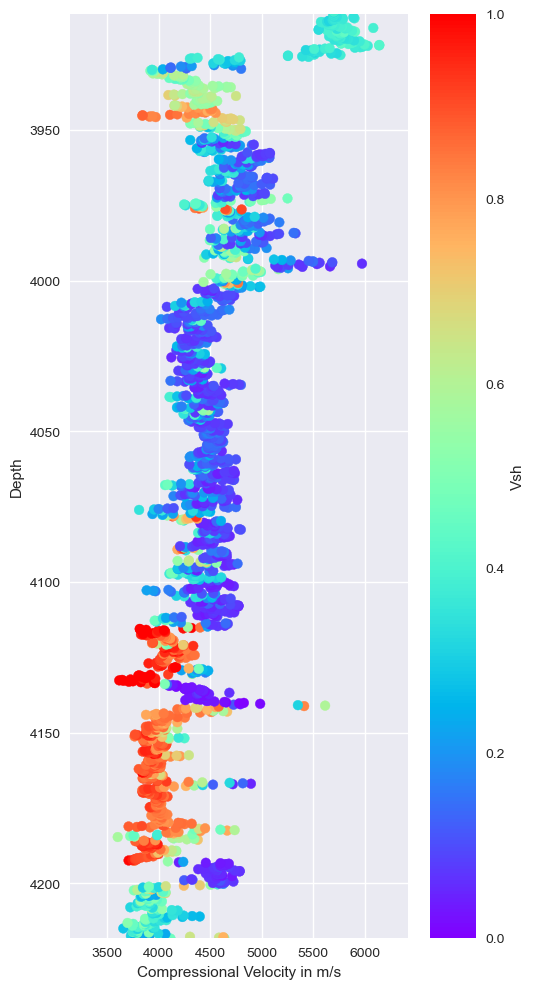

In [90]:
fig=plt.figure(figsize=(12,12))
plt.subplot(121)
plt.style.use('seaborn')
X1=304800/(df.DTCO)
Y1=304800/(df.DTSM)
plt.scatter(x=X1,y=df.DEPTH,c=I_GR,vmin=0,vmax=1,cmap='rainbow')
plt.xlabel('Compressional Velocity in m/s')
plt.ylim(4218,3911.5)
plt.ylabel('Depth')
plt.colorbar(label='Vsh')

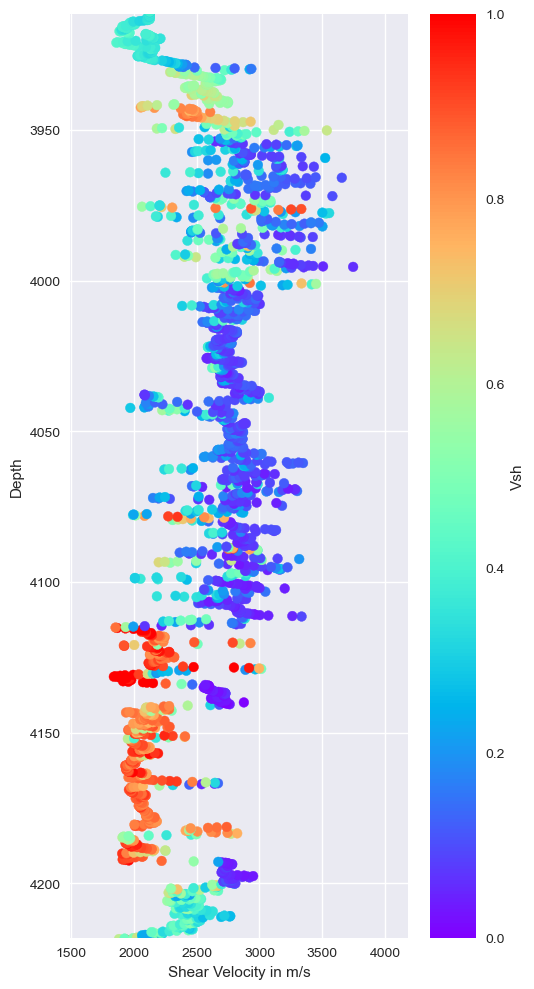

In [91]:
fig=plt.figure(figsize=(12,12))
plt.subplot(121)
plt.style.use('seaborn')
X1=304800/(df.DTCO)
Y1=304800/(df.DTSM)
plt.scatter(x=Y1,y=df.DEPTH,c=I_GR,vmin=0,vmax=1,cmap='rainbow')
plt.xlabel('Shear Velocity in m/s')
plt.ylim(4218,3911.5)
plt.ylabel('Depth')
plt.colorbar(label='Vsh')

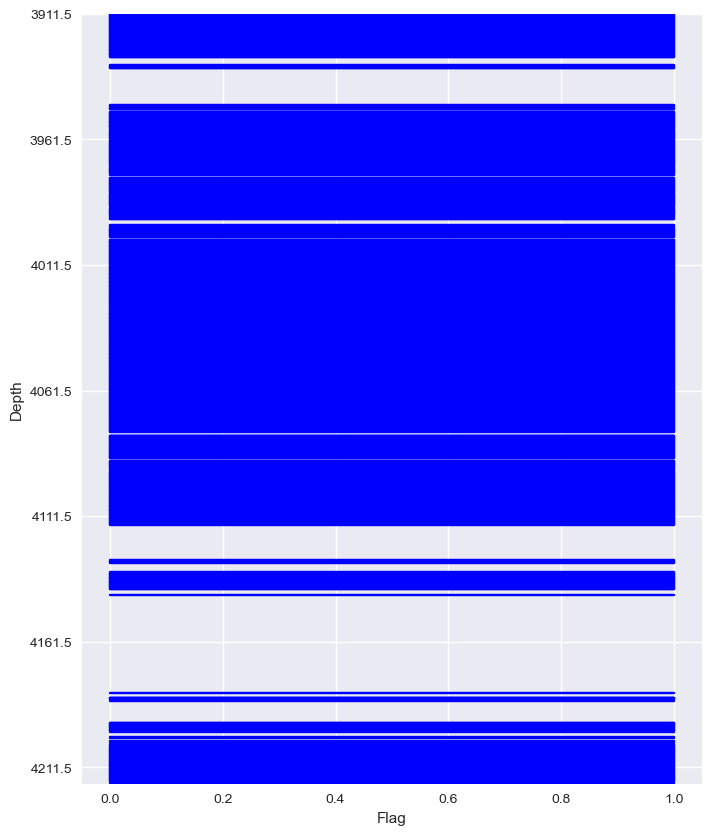

In [105]:
Vshale1 = np.array(Vshale)
S_wa1 = np.array(S_wa)
fig = plt.figure(figsize=(8,10))
# print(len(I_GR1),len(S_wa1),len(df['DEPTH']))
for i in range(len(df['DEPTH'])):
    # Check if the condition is satisfied at this depth
    if (Vshale1[i] <= 0.4) & (S_wa1[i] <= 0.7):
        # If the condition is satisfied, plot a line from x=0 to x=1 at this depth
        plt.plot([0, 1], [df['DEPTH'].iloc[i], df['DEPTH'].iloc[i]], color='b')
        
# Set the y-axis limits to be the same as the depth range in the DataFrame
plt.ylim(df['DEPTH'].max(), df['DEPTH'].min())

# Set the x-axis limits to be 0 to 1
# plt.xlim(0, 1)
plt.yticks(np.arange(3911.5,4218,50))
# Label the axes
plt.xlabel('Flag')
plt.ylabel('Depth')
plt.ylim(4218,3911.5)
plt.show()

In [99]:
Res_flag=np.zeros(len(Vshale1))
for i in range(len(Res_flag)):
    if Vshale1[i]<=0.4 and S_wa1[i]<=0.7:
        Res_flag[i]=1
    else:
        Res_flag[i]=0
V_shc_res,S_w_res,total_porosity_res,dep = [],[],[],[]
for i in range(len(Res_flag)):
    if Res_flag[i]==1:
        V_shc_res.append(Vshale1[i])
        S_w_res.append(S_wa1[i])
        total_porosity_res.append(PHI_T[i])
        dep.append(df['DEPTH'][i])
df1=pd.DataFrame(zip(dep,V_shc_res,S_w_res,total_porosity_res),columns=['DEPTH','Volume of Shale','Water Saturation','Total Porosity'])
df1

,DEPTH,Volume of Shale,Water Saturation,Total Porosity
0,4719.5232,0.372690,0.588891,0.093297
1,4718.4564,0.379132,0.516860,0.113905
2,4718.3040,0.399577,0.495585,0.124703
3,4716.6276,0.055761,0.697513,0.074703
4,4716.4752,0.059927,0.578709,0.081378
...,...,...,...,...
2910,3909.6696,0.226001,0.048500,0.392851
2911,3909.5172,0.232893,0.048031,0.396189
2912,3909.3648,0.218429,0.046970,0.406149
2913,3909.2124,0.232993,0.048532,0.391649


In [100]:
df1.describe()

,DEPTH,Volume of Shale,Water Saturation,Total Porosity
count,2915.000000,2915.000000,2915.000000,2915.000000
mean,4305.775812,0.122488,0.331597,0.128803
std,257.508605,0.113459,0.179319,0.079879
min,3909.060000,-0.016548,0.018457,0.025716
25%,4047.363000,0.028783,0.185361,0.081824
50%,4405.274400,0.083880,0.341743,0.102946
75%,4541.596200,0.209332,0.465520,0.143088
max,4719.523200,0.399915,0.699735,0.709689


In [101]:

df1['Volume of Shale'].std()

0.11345937513508217

In [102]:
df1['Water Saturation'].std()

0.17931903409936586

In [103]:
df1['Total Porosity'].std()

0.07987868820065658